In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [4]:
df = pd.read_excel("bisiklet_fiyatlari.xlsx")
df.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# y = w*x + b
# y: label
y = df["Fiyat"].values

# x: feature
x = df[["BisikletOzellik1","BisikletOzellik2"]].values

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33, random_state=15)

In [7]:
# scaling
# nöronlara verilecek veriler küçültülüp işlem kolaylaştırılmalı
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()

# modele nöronlar ekliyoruz
# 3: nöron sayısı, 4 defa çağırmamız: katman sayısı
model.add(Dense(3, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(3, activation = "relu"))
model.add(Dense(3, activation = "relu"))


# output katmanı
model.add(Dense(1))

model.compile(optimizer = "rmsprop", loss = "mse")

In [19]:
model.fit(x_train, y_train, epochs=250)

Epoch 1/250
21/21 [==============================] - 1s 2ms/step - loss: 795836.8750
Epoch 2/250
21/21 [==============================] - 0s 2ms/step - loss: 795740.2500
Epoch 3/250
21/21 [==============================] - 0s 2ms/step - loss: 795640.2500
Epoch 4/250
21/21 [==============================] - 0s 1ms/step - loss: 795526.8750
Epoch 5/250
21/21 [==============================] - 0s 2ms/step - loss: 795398.7500
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 795250.5000
Epoch 7/250
21/21 [==============================] - 0s 1ms/step - loss: 795076.0000
Epoch 8/250
21/21 [==============================] - 0s 2ms/step - loss: 794873.8125
Epoch 9/250
21/21 [==============================] - 0s 1ms/step - loss: 794638.7500
Epoch 10/250
21/21 [==============================] - 0s 2ms/step - loss: 794366.9375
Epoch 11/250
21/21 [==============================] - 0s 2ms/step - loss: 794052.8750
Epoch 12/250
21/21 [==============================] - 0s 1ms/st

In [20]:
loss = model.history.history["loss"]

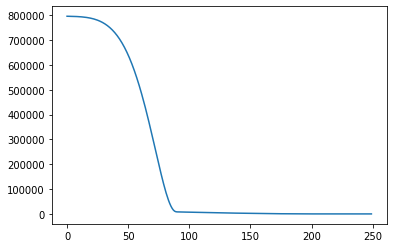

In [21]:
sbn.lineplot(x = range(len(loss)), y = loss)

In [23]:
trainLoss = model.evaluate(x_train, y_train, verbose = 1)
testLoss = model.evaluate(x_test, y_test, verbose = 1)

11/11 [==============================] - 0s 2ms/step - loss: 75.0822


In [24]:
testPredictions = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [25]:
predictDf = pd.DataFrame(y_test, columns = ["Real Y"])

In [26]:
testPredictions = pd.Series(testPredictions.reshape(330,))

In [27]:
predictDf = pd.concat([predictDf, testPredictions], axis=1)

In [28]:
predictDf.columns = ["Real Y", "Predict Y"]
predictDf

,Real Y,Predict Y
0,1081.652164,1078.285156
1,622.675990,624.131470
2,889.356810,876.509460
3,902.826733,894.678589
4,897.662404,899.949402
...,...,...
325,1028.438035,1014.013062
326,789.934950,791.217407
327,758.490486,766.315308
328,1172.871659,1168.104614


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
mean_absolute_error(predictDf["Real Y"], predictDf["Predict Y"])

6.93719386527817

In [31]:
newBikeFeatures = [[1746, 1752]]
newBikeFeatures = scaler.transform(newBikeFeatures)
model.predict(newBikeFeatures)

1/1 [==============================] - 0s 82ms/step


array([[891.478]], dtype=float32)